In this notebook:

- [x] 4A,B Heatmaps by category
- [x] 4C rankings
- [x] 4D,E,F windowed examples

In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import os
from arnie.mfe import mfe
from arnie.pfunc import pfunc
from arnie.bpps import bpps
#from ipynb.draw import draw_struct
from RiboGraphViz import RGV

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


In [3]:
! ls ../scoring_data/

Apr17byproj_pearson_summarystats.csv
DONE_17Apr2021ScoreDF.json.zip
EB_+efold_pearson_ranking.csv
EB_+efold_pearson_zscores_by_Dataset.csv
EB_+efold_test_pearson_ranking.csv
EB_+efold_test_pearson_zscores_by_Dataset.csv
EB_-efold_pearson_ranking.csv
EB_-efold_pearson_zscores_by_Dataset.csv
EB_all_eternafold_versions_pearson_ranking.csv
EB_all_eternafold_versions_pearson_zscores_by_Dataset.csv
EB_projects_+efold_pearson_ranking.csv
EB_projects_+efold_pearson_zscores_by_project_name.csv
EB_projects_-efold_pearson_ranking.csv
EB_projects_-efold_pearson_zscores_by_project_name.csv
EB_spearman_ranking.csv
EB_spearman_zscores_by_Dataset.csv
EternaBench_ChemMapping_Example_Correlations_Round1.csv
EternaBench_external_ranking.csv
EternaBench_external_zscores_by_dataset_MANUAL_COMPILED.csv
Ext1200_pearson_ranking.csv
Ext1200_pearson_zscores_by_Dataset.csv
Ext300_pearson_ranking.csv
Ext300_pearson_zscores_by_Dataset.csv
Ext600_pearson_ranking.csv
Ext600_pearson_zscores_by_Dataset.csv
Ext900_pear

In [4]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EternaBench_external_zscores_by_dataset_MANUAL_COMPILED.csv')
#ranking = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EternaBench_external_ranking.csv')
package_order=['rnastructure','vienna_2','vienna_2_60C','rnastructure_60C', 'rnasoft_blstar', 'contrafold_2','eternafold_B']

types = ['viral_gRNA','SARS-CoV-2_gRNA','mRNA','rRNA','synthetic RNA']

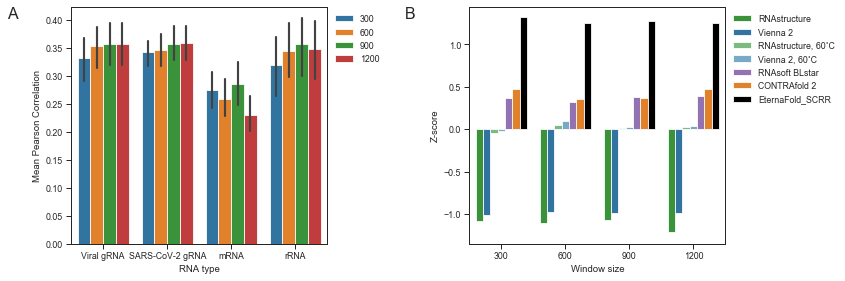

In [110]:
figure(figsize=(12,4))
subplot(1,2,1)
sns.barplot(x='Class',y='pearson_mean', data=zscores.loc[zscores.Class!='small RNAs'],hue='window_size')
legend(frameon=False, bbox_to_anchor=(1,1))
ylabel('Mean Pearson Correlation')
xlabel('RNA type')
xticks(range(4), ['Viral gRNA','SARS-CoV-2 gRNA','mRNA','rRNA'])
annotate('A', xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
light_Green = sns.color_palette('Greens',3)[1]
light_blue = sns.color_palette('Blues',3)[1]
palette = [brown, blue, red, green, orange, purple, [0,0,0]]

subplot(1,2,2)

palette=[green, blue, light_Green, light_blue, purple, orange, [0,0,0]]
sns.barplot(x='window_size',y='pearson_zscore_by_Dataset_mean', data=zscores.loc[zscores.Class!='small RNAs'],hue='title',hue_order=title_order, palette=palette,ci=False)
legend(bbox_to_anchor=(1,1),frameon=False)
annotate('B', xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)
ylabel('Z-score')
xlabel('Window size')

tight_layout()

savefig('FIGURES/SI/all_windows_analysis.pdf',bbox_inches='tight')
savefig('FIGURES/SI/all_windows_analysis.png',dpi=300, bbox_inches='tight')

In [6]:
ds_to_remove = ['Rice,2014 SHAPE(1M6)','Simon,2019 Ecoli invitro',
       'Rice,2014 SHAPE(1M7)', 'Rice,2014 SHAPE(NMIA)']

zscores = zscores.loc[~zscores.Dataset.isin(ds_to_remove)]
zscores = zscores.loc[zscores.window_size==900]

In [16]:
zscores.groupby(['Class','package'])['pearson_zscore_by_Dataset_mean'].mean()

Class            package         
SARS-CoV-2_gRNA  contrafold_2        0.376274
                 eternafold_B        1.660907
                 rnasoft_blstar      0.541391
                 rnastructure       -1.066317
                 rnastructure_60C   -0.255158
                 vienna_2           -1.010323
                 vienna_2_60C       -0.246773
mRNA             contrafold_2       -0.017561
                 eternafold_B        1.273168
                 rnasoft_blstar      0.244681
                 rnastructure       -1.161934
                 rnastructure_60C    0.316993
                 vienna_2           -1.020964
                 vienna_2_60C        0.365617
rRNA             contrafold_2        0.792319
                 eternafold_B        0.845613
                 rnasoft_blstar      0.368054
                 rnastructure       -0.937011
                 rnastructure_60C   -0.217469
                 vienna_2           -0.784364
                 vienna_2_60C       -0.067141


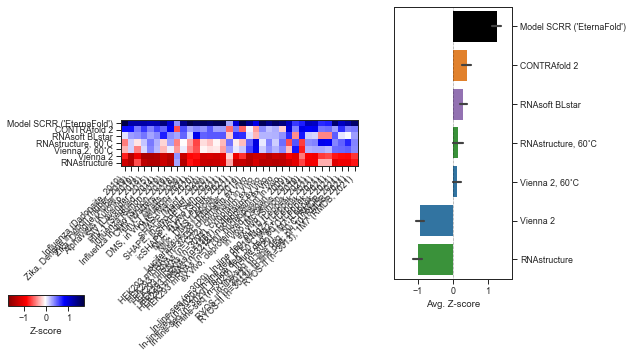

In [57]:
eb.plot.ranked_heatmap(tmp, tmp_ranking, package_order=list(reversed(package_order)), vmin=-1.7,vmax=1.7, ext=True)
savefig('FIGURES/4/total_ranking.pdf',bbox_inches='tight')

In [50]:
stats = tmp.groupby('package').mean()

stats.sort_values('pearson_zscore_by_Dataset_mean')

,pearson_mean,pearson_std,pearson_percentile_2.5,pearson_percentile_97.5,pearson_zscore_by_Dataset_mean,pearson_zscore_by_Dataset_std,pearson_zscore_by_Dataset_percentile_2.5,pearson_zscore_by_Dataset_percentile_97.5,window_size
package,,,,,,,,,
nupack_99,0.283163,0.004609,0.274525,0.292339,-1.216727,0.362146,-1.850412,-0.434007,900.0
rnastructure,0.295040,0.008332,0.278724,0.311473,-1.012808,0.294365,-1.544325,-0.405930,900.0
vienna_2,0.297423,0.008316,0.281498,0.313743,-0.954309,0.295913,-1.488647,-0.343298,900.0
vienna_2_60C,0.326553,0.008042,0.310818,0.342037,0.121847,0.314024,-0.486602,0.725392,900.0
rnastructure_60C,0.326273,0.008077,0.310340,0.341971,0.156202,0.311422,-0.463242,0.744099,900.0
rnasoft_blstar,0.334061,0.007892,0.318582,0.349581,0.302221,0.308133,-0.294673,0.896454,900.0
contrafold_2,0.335528,0.007735,0.320390,0.350643,0.395241,0.303686,-0.202915,0.971006,900.0
eternafold_B,0.358225,0.007827,0.342976,0.373368,1.261989,0.273315,0.696494,1.741739,900.0


        package               Dataset  pearson_mean  pearson_std  \
0  rnastructure            Watts,2009      0.440160     0.008865   
1  rnastructure        Siegfried,2014      0.311273     0.007087   
2  rnastructure         Lavender,2015      0.301757     0.006999   
3  rnastructure          Kutchko,2018      0.376458     0.005806   
4  rnastructure  Huber, 2019 in vitro      0.168466     0.008605   

   pearson_percentile_2.5  pearson_percentile_97.5  \
0                0.422581                 0.456770   
1                0.297357                 0.325103   
2                0.288590                 0.314688   
3                0.364985                 0.387538   
4                0.151499                 0.184527   

   pearson_zscore_by_Dataset_mean  pearson_zscore_by_Dataset_std  \
0                       -1.338975                       0.135768   
1                       -1.366793                       0.114206   
2                       -1.359520                       0.1343

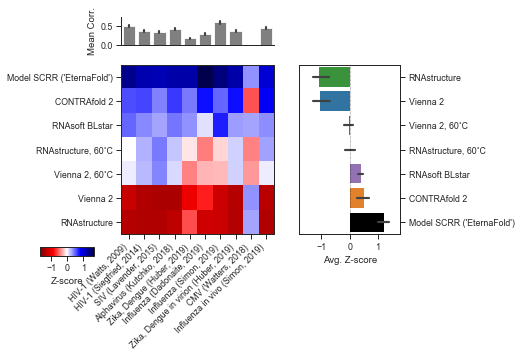

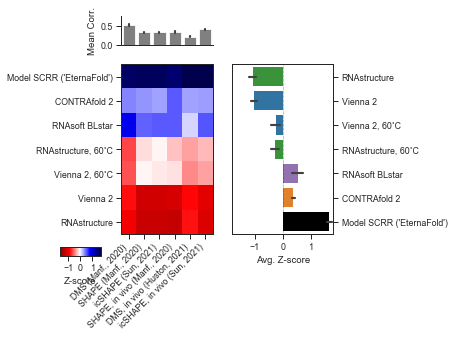

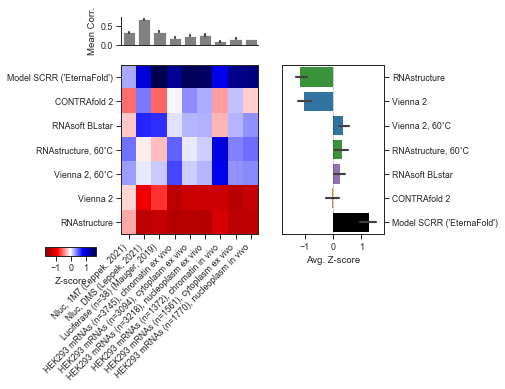

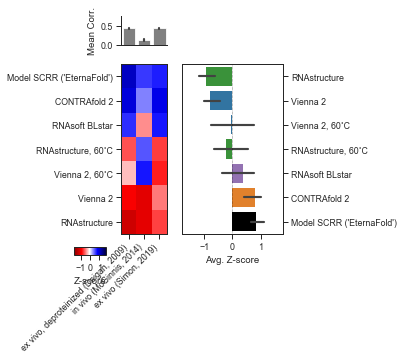

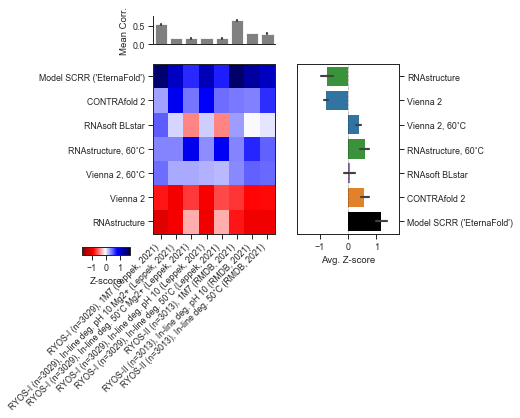

In [60]:
for i, rna in enumerate(types):
    tmp_zscores = zscores.loc[zscores.window_size==900][zscores.Class==rna]
    #tmp_ranking = ranking.loc[ranking.window_size==900][ranking.Class==rna]
    n=len(tmp_zscores.Dataset.unique())
    
    eb.plot.ranked_heatmap_w_bar_overhead(tmp_zscores, tmp_ranking, package_order=package_order, vmin=-1.7,vmax=1.7,figsize=(.3*n+2,4), width_ratios=[.3*n, 2], ext=True)
    savefig('FIGURES/4/%s_heatmap.pdf' % rna,bbox_inches='tight')

In [22]:
tmp_zscores

,package,Dataset,pearson_mean,pearson_std,pearson_percentile_2.5,pearson_percentile_97.5,pearson_zscore_by_Dataset_mean,pearson_zscore_by_Dataset_std,pearson_zscore_by_Dataset_percentile_2.5,pearson_zscore_by_Dataset_percentile_97.5,window_size,Class,title,category
111,contrafold_2,1_deg_50C,0.183483,0.006908,0.171004,0.196927,0.876536,0.507096,-0.119737,1.811165,900.0,synthetic RNA,CONTRAfold 2,4
112,contrafold_2,1_deg_Mg_50C,0.184011,0.006736,0.171233,0.197853,0.910777,0.503381,-0.113380,1.825508,900.0,synthetic RNA,CONTRAfold 2,4
113,contrafold_2,1_deg_Mg_pH10,0.161259,0.006134,0.149534,0.173415,0.451593,0.717133,-0.900144,1.776511,900.0,synthetic RNA,CONTRAfold 2,4
114,contrafold_2,1_deg_pH10,0.161648,0.006368,0.149755,0.174651,0.490741,0.725721,-0.991020,1.851715,900.0,synthetic RNA,CONTRAfold 2,4
115,contrafold_2,1_reactivity,0.533161,0.001425,0.530435,0.535920,0.314316,0.051864,0.212315,0.416617,900.0,synthetic RNA,CONTRAfold 2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,nupack_99,1_deg_pH10,0.148744,0.005421,0.138365,0.159239,-1.079667,0.578422,-2.061856,0.192178,900.0,synthetic RNA,NUPACK 1999,2
837,nupack_99,1_reactivity,0.488290,0.001684,0.485197,0.491539,-1.452134,0.049116,-1.544368,-1.349785,900.0,synthetic RNA,NUPACK 1999,2
838,nupack_99,2_deg_Mg_50C,0.264114,0.006516,0.252025,0.277277,-1.168188,0.403797,-1.947144,-0.303853,900.0,synthetic RNA,NUPACK 1999,2
839,nupack_99,2_deg_Mg_pH10,0.293701,0.004791,0.283903,0.302824,-1.211189,0.360471,-1.876226,-0.470178,900.0,synthetic RNA,NUPACK 1999,2


<Figure size 432x288 with 0 Axes>

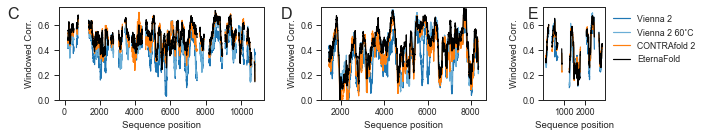

In [18]:
ex_data=['Huber (2019), ZILM','Sun, 2019 HEK293 chromatin in vitro ENST00000534336',
         'Deigan, 2009 ex vivo deproteinized e. Coli 23S rRNA' ]

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
palette = [brown, blue, red, green,orange, purple, [0,0,0]]

titles=['Vienna 2', 'Vienna 2 60˚C', 'CONTRAfold 2','EternaFold']

packages = ['vienna_2', 'vienna_2_60C','contrafold_2', 'eternafold_B']
light_blue=sns.color_palette('Blues',3)[1]

colors=[blue, light_blue, orange,'k']

figure(figsize=(6,4))

gridkw = dict(width_ratios=[10,8,3])
fig, ax = plt.subplots(1,3, gridspec_kw=gridkw, figsize=(10,2))

letters=list('CDE')

for ex_ind, ex in enumerate(ex_data):
    for p, pkg in enumerate(packages):
        df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/Ext900/CM_%s.json.zip' % pkg)
        tmp = df.loc[df.name==ex]
        n=tmp['orig_seqpos'].iloc[-1][-1]+1
        cat_r = {k:[] for k in range(n)}
        cat_p = {k:[] for k in range(n)}
        for _, row in tmp.iterrows():
            for i, orig in enumerate(row['orig_seqpos']):
                cat_p[orig].append(row['p_%s' % pkg][i])
                cat_r[orig].append(row['reactivity'][i])

        cat_R = [cat_r[i][0] for i in range(n)]
        cat_P = [np.nanmedian(cat_p[i]) for i in range(n)]

        dat = pd.DataFrame({'R': cat_R, 'P': cat_P})
        ax[ex_ind].plot(dat['R'].rolling(150).corr(dat['P']),c=colors[p],label=titles[p])
    ax[ex_ind].set_ylabel('Windowed Corr.')
    ax[ex_ind].set_ylim([0,0.75])
    ax[ex_ind].annotate(letters[ex_ind], xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)

    ax[ex_ind].set_xlabel('Sequence position')
    if ex_ind==2:
        legend(bbox_to_anchor=(1,1),frameon=False)
    
tight_layout()
savefig('FIGURES/4/4CDE.pdf',bbox_inches='tight')

In [38]:
metadata_df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/ExternalData_window900_all.json.zip')
metadata_df = metadata_df.loc[metadata_df.name== 'Manfredonia, 2020 SARS-CoV-2 DMS in vitro']

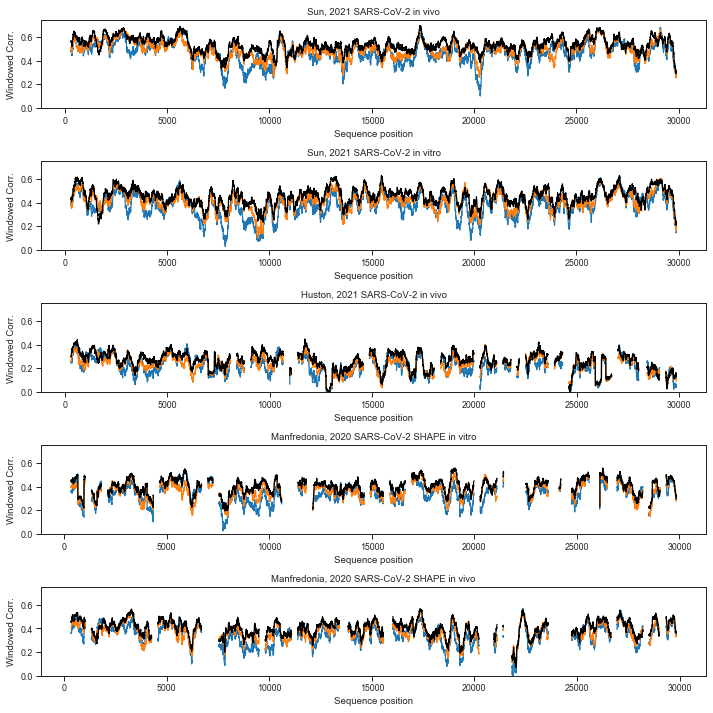

In [66]:
names=['Sun, 2021 SARS-CoV-2 in vivo',
 'Sun, 2021 SARS-CoV-2 in vitro',
 'Huston, 2021 SARS-CoV-2 in vivo',
# 'Manfredonia, 2020 SARS-CoV-2 DMS in vitro',
 'Manfredonia, 2020 SARS-CoV-2 SHAPE in vitro',
 'Manfredonia, 2020 SARS-CoV-2 SHAPE in vivo']

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
palette = [brown, blue, red, green, orange, purple, [0,0,0]]

packages = ['vienna_2', 'contrafold_2', 'eternafold_B']
colors=[blue, orange,'k']

fig, ax = plt.subplots(5,1, figsize=(10,10))

letters=list('CDE')

for ex_ind, ex in enumerate(names):
    for p, pkg in enumerate(packages):
        df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/Ext900/CM_%s.json.zip' % pkg)
        metadata_df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/ExternalData_window900_all.json.zip')
        metadata_df = metadata_df.loc[metadata_df.name==ex]
        keys_to_add = [k for k in df.keys() if 'p_' in k]+['sequence']
        metadata_df = metadata_df.merge(df[keys_to_add], on='sequence')
        tmp = metadata_df
        n=tmp['orig_seqpos'].iloc[-1][-1]+1
        cat_r = {k:[] for k in range(n)}
        cat_p = {k:[] for k in range(n)}
        for _, row in tmp.iterrows():
            for i, orig in enumerate(row['orig_seqpos']):
                cat_p[orig].append(row['p_%s' % pkg][i])
                cat_r[orig].append(row['reactivity'][i])

        cat_R = [cat_r[i][0] for i in range(n)]
        cat_P = [np.nanmedian(cat_p[i]) for i in range(n)]

        dat = pd.DataFrame({'R': cat_R, 'P': cat_P})
        ax[ex_ind].plot(dat['R'].rolling(300).corr(dat['P']),c=colors[p])
    ax[ex_ind].set_ylabel('Windowed Corr.')
    ax[ex_ind].set_ylim([0,0.75])
    ax[ex_ind].set_title(ex)
    #ax[ex_ind].annotate(letters[ex_ind], xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)

    ax[ex_ind].set_xlabel('Sequence position')
    
tight_layout()
savefig('FIGURES/4/4_sars_cov_2.pdf',bbox_inches='tight')

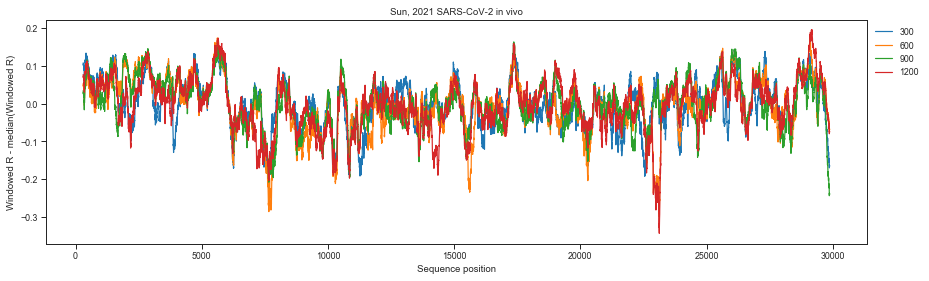

In [59]:
names=['Sun, 2021 SARS-CoV-2 in vivo',
 'Sun, 2021 SARS-CoV-2 in vitro',
 'Huston, 2021 SARS-CoV-2 in vivo',
 'Manfredonia, 2020 SARS-CoV-2 DMS in vitro',
 'Manfredonia, 2020 SARS-CoV-2 SHAPE in vitro',
 'Manfredonia, 2020 SARS-CoV-2 SHAPE in vivo']

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
palette = [brown, blue, red, green,orange, purple, [0,0,0]]

packages = ['eternafold_B']
colors=sns.color_palette('tab10',6)

figure(figsize=(13,4))

letters=list('CDE')

for ii, window_size in enumerate([300,600,900,1200]):
    for ex_ind, ex in enumerate(names[:1]):
        df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/Ext%d/CM_%s.json.zip' % (window_size, pkg))
        metadata_df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/ExternalData_window%d_all.json.zip' % window_size)
        metadata_df = metadata_df.loc[metadata_df.name==ex]
        keys_to_add = [k for k in df.keys() if 'p_' in k]+['sequence']
        metadata_df = metadata_df.merge(df[keys_to_add], on='sequence')
        tmp = metadata_df
        n=tmp['orig_seqpos'].iloc[-1][-1]+1
        cat_r = {k:[] for k in range(n)}
        cat_p = {k:[] for k in range(n)}
        for _, row in tmp.iterrows():
            for i, orig in enumerate(row['orig_seqpos']):
                cat_p[orig].append(row['p_%s' % pkg][i])
                cat_r[orig].append(row['reactivity'][i])

        cat_R = [cat_r[i][0] for i in range(n)]
        cat_P = [np.nanmedian(cat_p[i]) for i in range(n)]

        dat = pd.DataFrame({'R': cat_R, 'P': cat_P})

        corr_trace = dat['R'].rolling(300).corr(dat['P'])
        corr_trace -= np.nanmedian(corr_trace)
        plot(corr_trace,c=colors[ii],label=window_size)

legend(bbox_to_anchor=(1,1),frameon=False)
ylabel('Windowed R - median(Windowed R)')
#ylim([0,0.75])
title(ex)
xlabel('Sequence position')
    
tight_layout()
savefig('FIGURES/4/4_sars_cov_2_in_one.pdf',bbox_inches='tight')

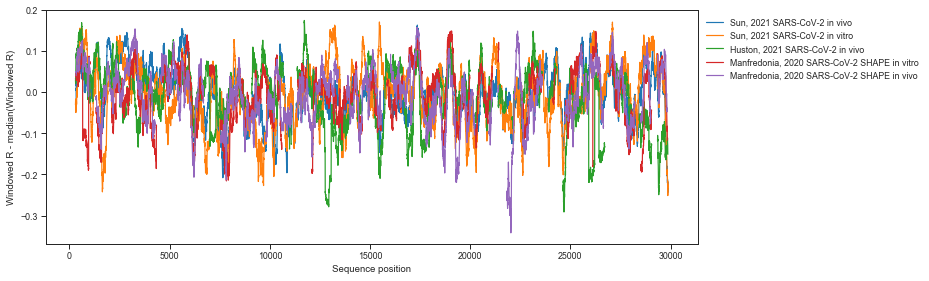

In [69]:
names=['Sun, 2021 SARS-CoV-2 in vivo',
 'Sun, 2021 SARS-CoV-2 in vitro',
 'Huston, 2021 SARS-CoV-2 in vivo',
# 'Manfredonia, 2020 SARS-CoV-2 DMS in vitro',
 'Manfredonia, 2020 SARS-CoV-2 SHAPE in vitro',
 'Manfredonia, 2020 SARS-CoV-2 SHAPE in vivo']

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
palette = [brown, blue, red, green,orange, purple, [0,0,0]]

packages = ['eternafold_B']
colors=sns.color_palette('tab10',6)

figure(figsize=(13,4))

letters=list('CDE')

corr_traces=[]
punpaireds=[]
reactivities=[]

for ex_ind, ex in enumerate(names):
    df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/Ext900/CM_%s.json.zip' % pkg)
    metadata_df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/ExternalData_window900_all.json.zip')
    metadata_df = metadata_df.loc[metadata_df.name==ex]
    keys_to_add = [k for k in df.keys() if 'p_' in k]+['sequence']
    metadata_df = metadata_df.merge(df[keys_to_add], on='sequence')
    tmp = metadata_df
    n=tmp['orig_seqpos'].iloc[-1][-1]+1
    cat_r = {k:[] for k in range(n)}
    cat_p = {k:[] for k in range(n)}
    for _, row in tmp.iterrows():
        for i, orig in enumerate(row['orig_seqpos']):
            cat_p[orig].append(row['p_%s' % pkg][i])
            cat_r[orig].append(row['reactivity'][i])

    cat_R = [cat_r[i][0] for i in range(n)]
    cat_P = [np.nanmedian(cat_p[i]) for i in range(n)]

    dat = pd.DataFrame({'R': cat_R, 'P': cat_P})

    corr_trace = dat['R'].rolling(300).corr(dat['P'])
    corr_trace -= np.nanmedian(corr_trace)
    plot(corr_trace,c=colors[ex_ind],label=ex)
    
    punpaireds.append(dat['P'].rolling(300).mean())
    reactivities.append(dat['R'].rolling(300).mean())
    corr_traces.append(corr_trace)

legend(bbox_to_anchor=(1,1),frameon=False)
ylabel('Windowed R - median(Windowed R)')
#ylim([0,0.75])
xlabel('Sequence position')
    
tight_layout()
savefig('FIGURES/4/4_sars_cov_2_in_one.pdf',bbox_inches='tight')

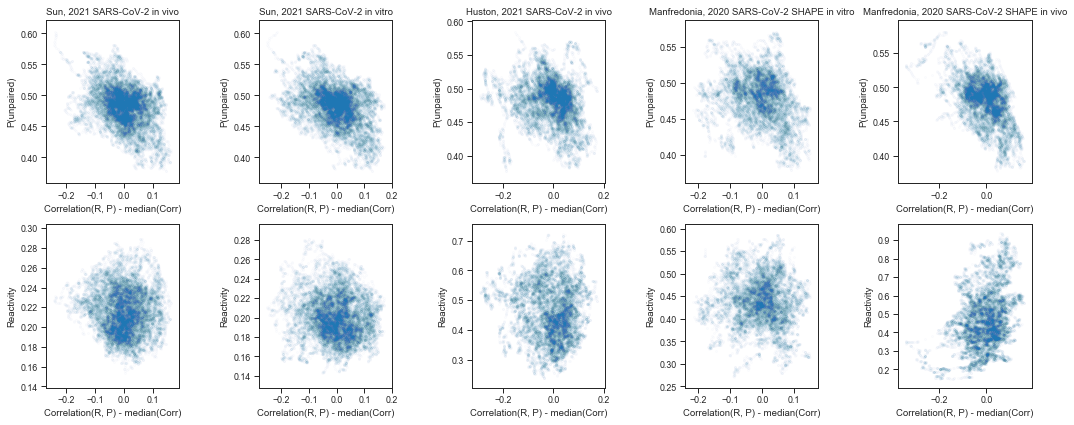

In [79]:
figure(figsize=(15,6))
for i in range(5):
    subplot(2,5,i+1)
    title(names[i])
    scatter(corr_traces[i], punpaireds[i],s=5,alpha=0.01)
    xlabel('Correlation(R, P) - median(Corr)')
    ylabel('P(unpaired)')
    subplot(2,5,i+6)
    scatter(corr_traces[i], reactivities[i],s=5,alpha=0.01)
    xlabel('Correlation(R, P) - median(Corr)')
    ylabel('Reactivity')
tight_layout()
